In [97]:
#Import dependencies

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import datetime

In [88]:
#Read data from Excel file

df = pd.read_excel("Resources/S&P500.xlsx")
df.head(10)

,Date,Close,Volume,Open,High,Low
0,2023-05-15,4136.28,--,4126.65,4141.25,4110.27
1,2023-05-12,4124.08,--,4138.54,4143.74,4099.12
2,2023-05-11,4130.62,--,4132.24,4132.80,4109.29
3,2023-05-10,4137.64,--,4143.74,4154.28,4098.92
4,2023-05-09,4119.17,--,4124.25,4130.35,4116.65
5,2023-05-08,4138.12,--,4136.98,4142.30,4123.81
6,2023-05-05,4136.25,--,4084.73,4147.02,4084.73
7,2023-05-04,4061.22,--,4082.55,4082.61,4048.28
8,2023-05-03,4090.75,--,4122.25,4148.30,4088.86
9,2023-05-02,4119.58,--,4164.10,4164.10,4089.72


In [89]:
#Date column conversion to datetime format

df["Date"] = pd.to_datetime(df["Date"], format = "%Y-%m-%d")

In [ ]:
#Defining training data and target values

x = df[["Close", "Open", "High", "Low"]].astype(int)
y = df["Date"]

In [92]:
#Fitting linear regression into training data

regression = LinearRegression().fit(x, y)

In [115]:
#Five year stock prediction

future_dates = [df.iloc[-1]["Date"] + datetime.timedelta(days = i * 365) for i in range(1, 6)]
future_dates = pd.DataFrame(future_dates, columns = ["Date"])
future_dates["Date"] = future_dates["Date"].astype(int)
future_predictions = regression.predict(future_dates[["Close", "Open", "High", "Low"]])

print(future_predictions)

KeyError: "None of [Index(['Close', 'Open', 'High', 'Low'], dtype='object')] are in the [columns]"

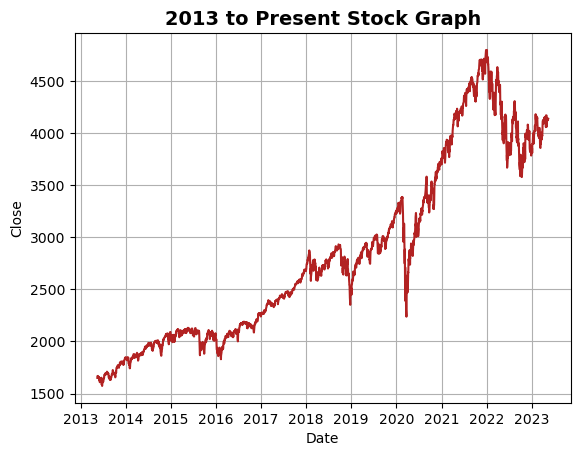

In [110]:
#2013 to present stock graph plot

sns.lineplot(x = "Date", y = "Close", data = df, color = "firebrick")
plt.title("2013 to Present Stock Graph", fontweight = "bold", fontsize = 14)
plt.grid()

plt.show()

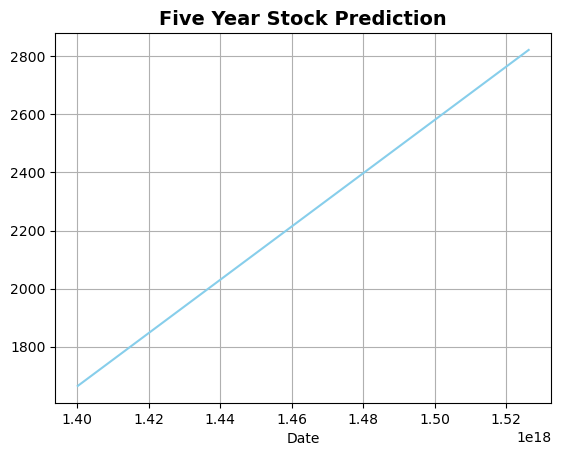

In [111]:
#Five year stock prediction graph

sns.lineplot(x = future_dates["Date"], y = future_predictions, color = "skyblue")
plt.title("Five Year Stock Prediction", fontweight = "bold", fontsize = 14)
plt.grid()

plt.show()